In [4]:
import pylab as pl

from common.statistics import *
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from matplotlib import rcParams

field = 7

marker_dict = {'UBr': "o", 'BAb':  "v", 'BTr': "<", 'BLb': ">", 'BHr':":"}
marker_colors = {'UBr': "red", 'BAb':  "blue", 'BTr': "red", 'BLb': "blue", 'BHr': "red"}
marker_names = {'UBr': "UniBRITE (UBr)", 'BAb':  "BRITE Austria (BAb)", 'BTr': "Toronto (BTr)", 'BLb': "Lem (BLb)",'BHr': "Heweliusz (BHr)"}

data_file = f"stats_data_field_{field}.csv"
override = False

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24
rcParams['xtick.labelsize'] = 24
rcParams['ytick.labelsize'] = 24
rcParams['legend.fontsize'] = 24


In [5]:
#Check if data file already exists
for i in range(1,18):
    internal_data_file = f"stats_data_field_{i}.csv"
    print(internal_data_file)
    if os.path.isfile(internal_data_file) and not override:
        print("Data file already exists")
    else:
        analysis = AnalyzeStar(i)
        analysis.load_data()
        result = analysis.process_stars()
        result.to_csv(internal_data_file)

stats_data_field_1.csv
Data file already exists
stats_data_field_2.csv
Data file already exists
stats_data_field_3.csv
Data file already exists
stats_data_field_4.csv
Data file already exists
stats_data_field_5.csv
Data file already exists
stats_data_field_6.csv
Data file already exists
stats_data_field_7.csv
Data file already exists
stats_data_field_8.csv
Data file already exists
stats_data_field_9.csv
Data file already exists
stats_data_field_10.csv
Data file already exists
stats_data_field_11.csv
Data file already exists
stats_data_field_12.csv
Data file already exists
stats_data_field_13.csv
Data file already exists
stats_data_field_14.csv
Data file already exists
stats_data_field_15.csv
Data file already exists
stats_data_field_16.csv
Data file already exists
stats_data_field_17.csv
Data file already exists


In [6]:
#Check if data file already exists
if os.path.isfile(data_file) and not override:
    print("Data file already exists")
    data = pd.read_csv(data_file)
else:
    analysis = AnalyzeStar(field)
    analysis.load_data()
    result = analysis.process_stars()
    result.to_csv(data_file)
    data = pd.read_csv(data_file)

Data file already exists


In [7]:
data

,Unnamed: 0,Starname,Field,Setup,Satellite,Merged,Filepath,V Magnitude,Spectral Type,RMS per orbit
0,0,HD186882,04-Cyg-I-2014,2,BLb,False,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.002330
1,1,HD186882,04-Cyg-I-2014,1,UBr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.006571
2,2,HD186882,04-Cyg-I-2014,1,BLb,False,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001780
3,3,HD186882,04-Cyg-I-2014,1,BTr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001010
4,4,HD186882,04-Cyg-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001010
...,...,...,...,...,...,...,...,...,...,...
185,185,HD203156,04-Cyg-I-2014,"['1', '2']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.882,F,0.047416
186,186,HD203156,04-Cyg-I-2014,['1'],UBr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.882,F,0.049804
187,187,HD206570,04-Cyg-I-2014,1,BTr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,5.840,C,0.013607
188,188,HD206570,04-Cyg-I-2014,2,BTr,False,/Users/marco/Google Drive/Astroseismology/BRIT...,5.840,C,0.010665


In [8]:
use_only_merged_files = True

In [9]:
data = data[data["Merged"] == use_only_merged_files]

In [10]:
satellites = np.unique(data["Satellite"])
satellites

array(['BLb', 'BTr', 'UBr'], dtype=object)

In [11]:
data

,Unnamed: 0,Starname,Field,Setup,Satellite,Merged,Filepath,V Magnitude,Spectral Type,RMS per orbit
4,4,HD186882,04-Cyg-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001010
5,5,HD186882,04-Cyg-I-2014,"['2', '1']",BLb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001955
6,6,HD186882,04-Cyg-I-2014,['1'],UBr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.006571
8,8,HD187849,04-Cyg-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.120,M,0.036503
10,10,HD188892,04-Cyg-I-2014,['1'],BLb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.946,B,0.004188
...,...,...,...,...,...,...,...,...,...,...
180,180,HD203064,04-Cyg-I-2014,"['1', '2']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.000,O,0.005373
181,181,HD203064,04-Cyg-I-2014,['2'],BLb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.000,O,0.075836
185,185,HD203156,04-Cyg-I-2014,"['1', '2']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.882,F,0.047416
186,186,HD203156,04-Cyg-I-2014,['1'],UBr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.882,F,0.049804


In [12]:
#ignore all nan values in V Magnitude and Spectral type
data = data[np.isfinite(data["V Magnitude"])]
data

,Unnamed: 0,Starname,Field,Setup,Satellite,Merged,Filepath,V Magnitude,Spectral Type,RMS per orbit
4,4,HD186882,04-Cyg-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001010
5,5,HD186882,04-Cyg-I-2014,"['2', '1']",BLb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.001955
6,6,HD186882,04-Cyg-I-2014,['1'],UBr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,2.870,A,0.006571
8,8,HD187849,04-Cyg-I-2014,['1'],BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.120,M,0.036503
10,10,HD188892,04-Cyg-I-2014,['1'],BLb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,4.946,B,0.004188
...,...,...,...,...,...,...,...,...,...,...
180,180,HD203064,04-Cyg-I-2014,"['1', '2']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.000,O,0.005373
181,181,HD203064,04-Cyg-I-2014,['2'],BLb,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.000,O,0.075836
185,185,HD203156,04-Cyg-I-2014,"['1', '2']",BTr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.882,F,0.047416
186,186,HD203156,04-Cyg-I-2014,['1'],UBr,True,/Users/marco/Google Drive/Astroseismology/BRIT...,5.882,F,0.049804


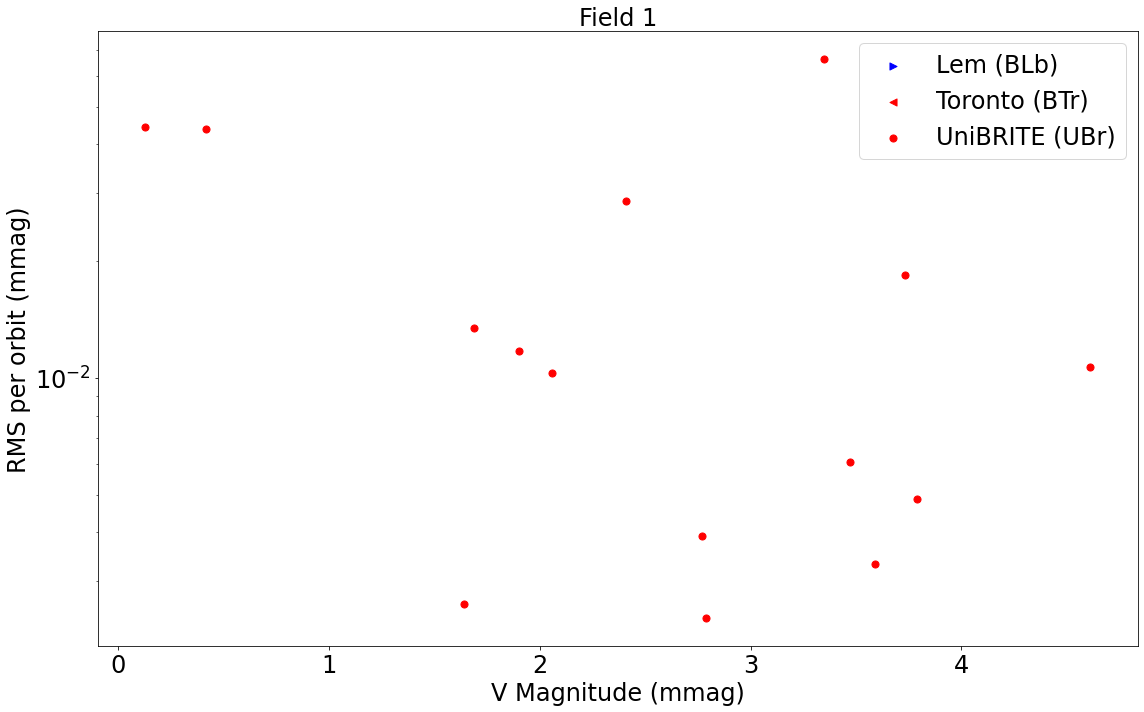

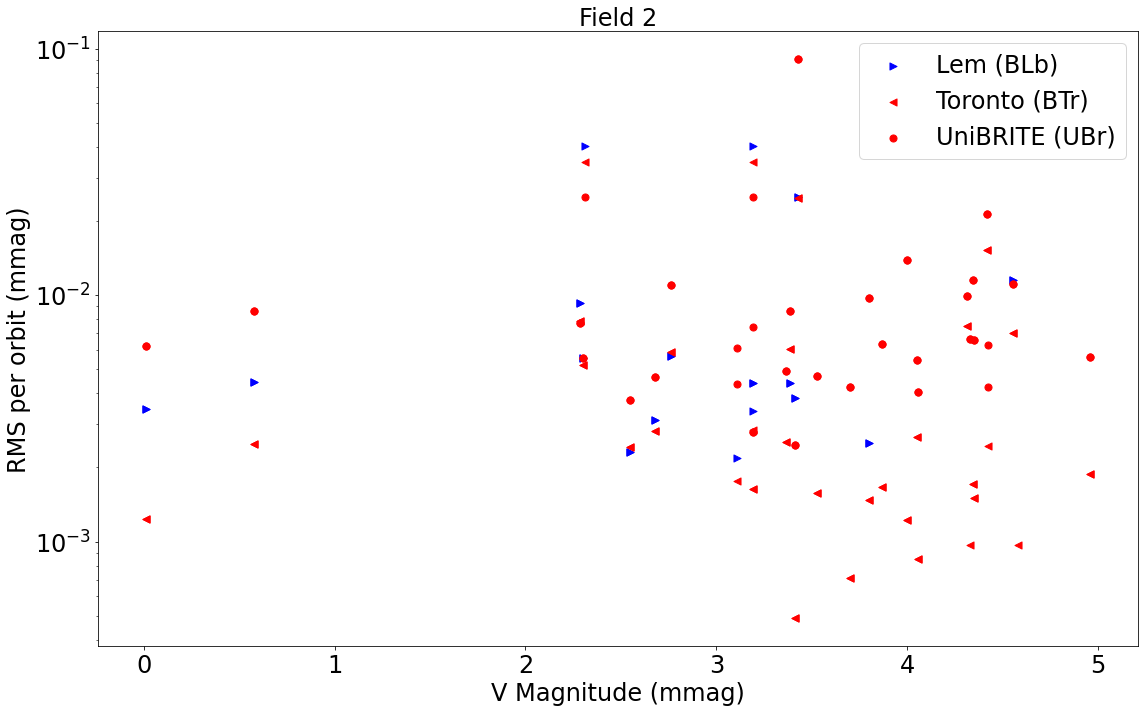

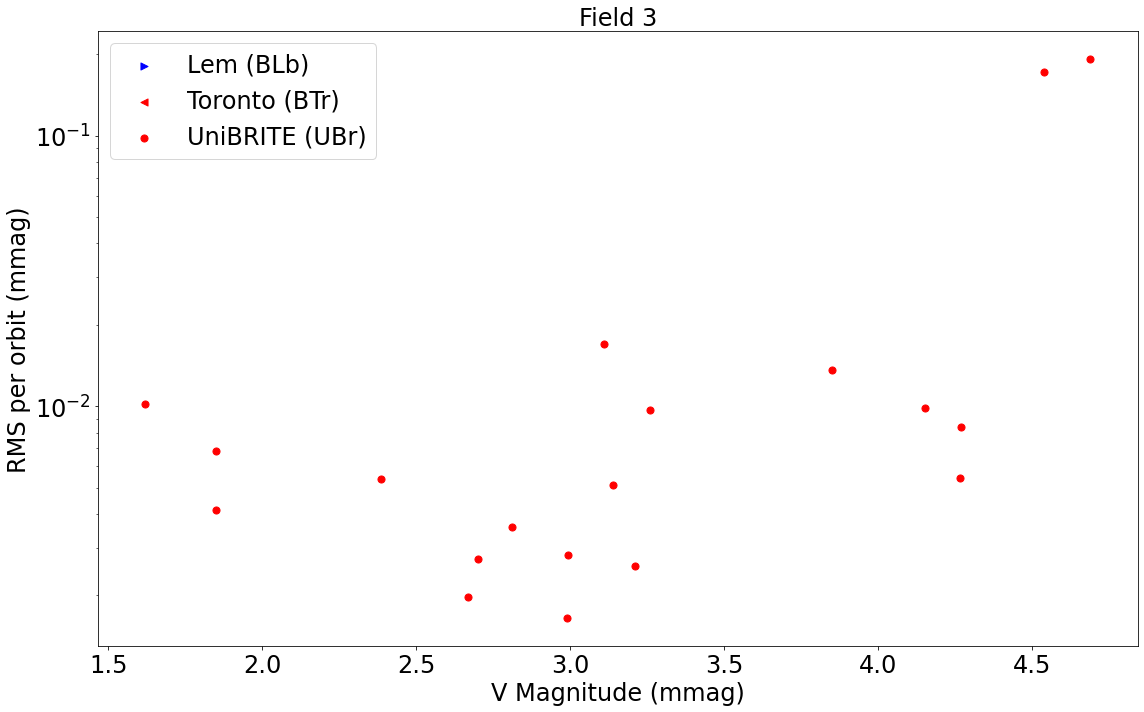

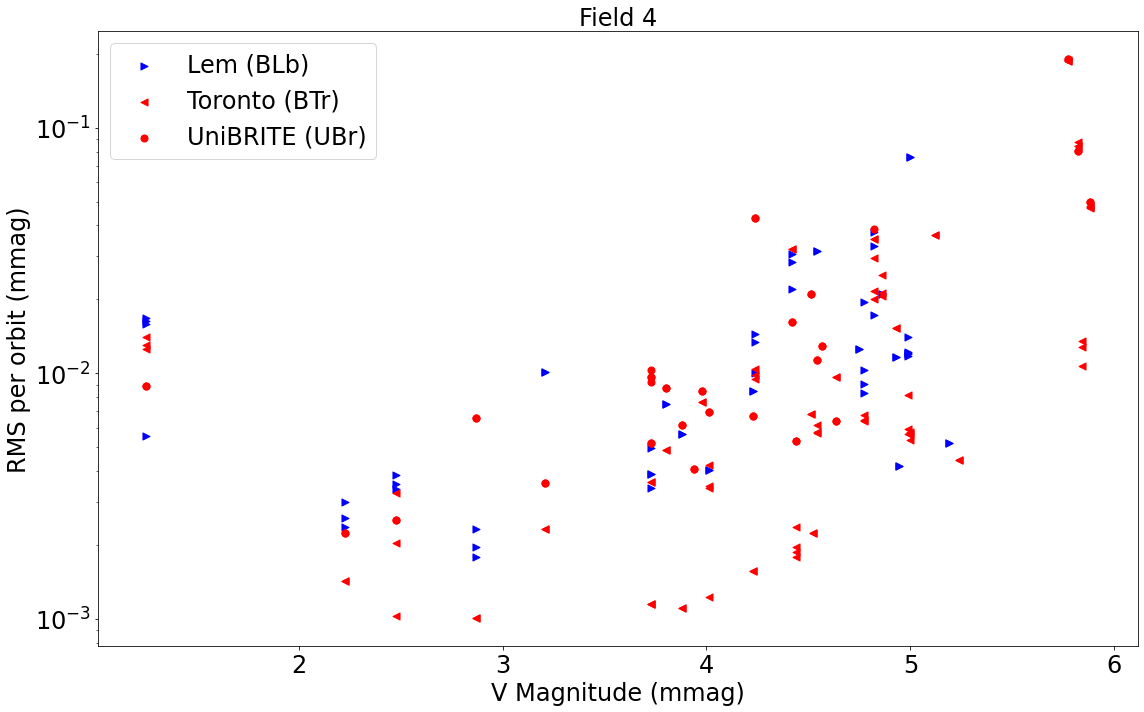

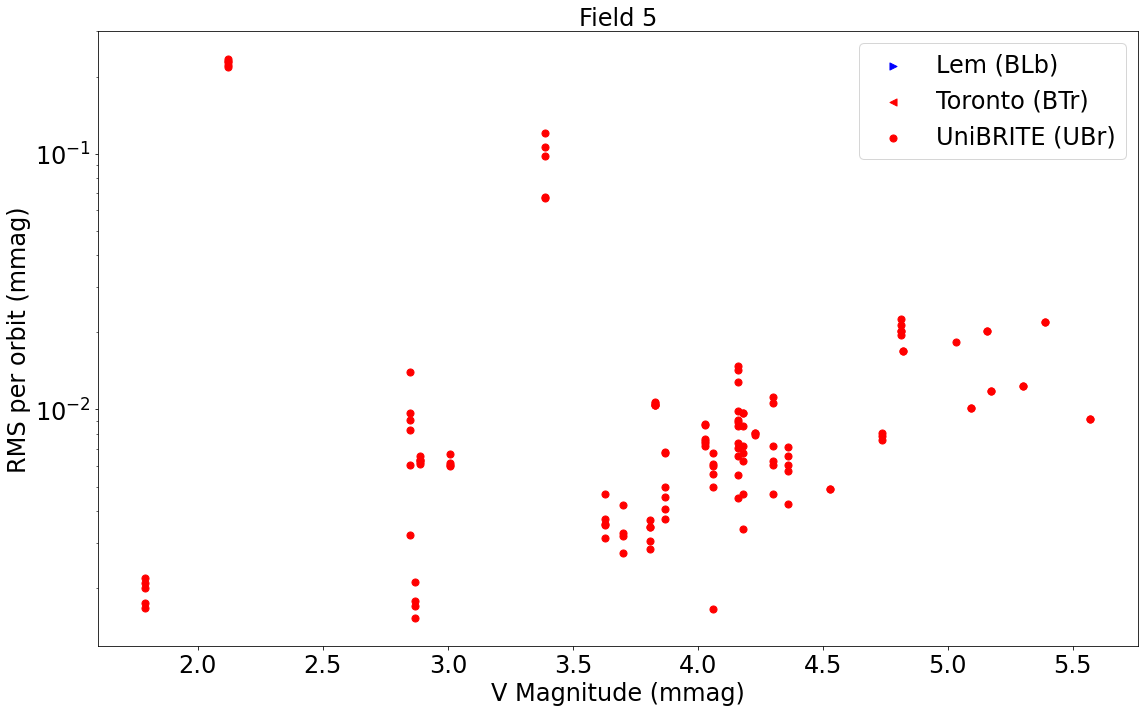

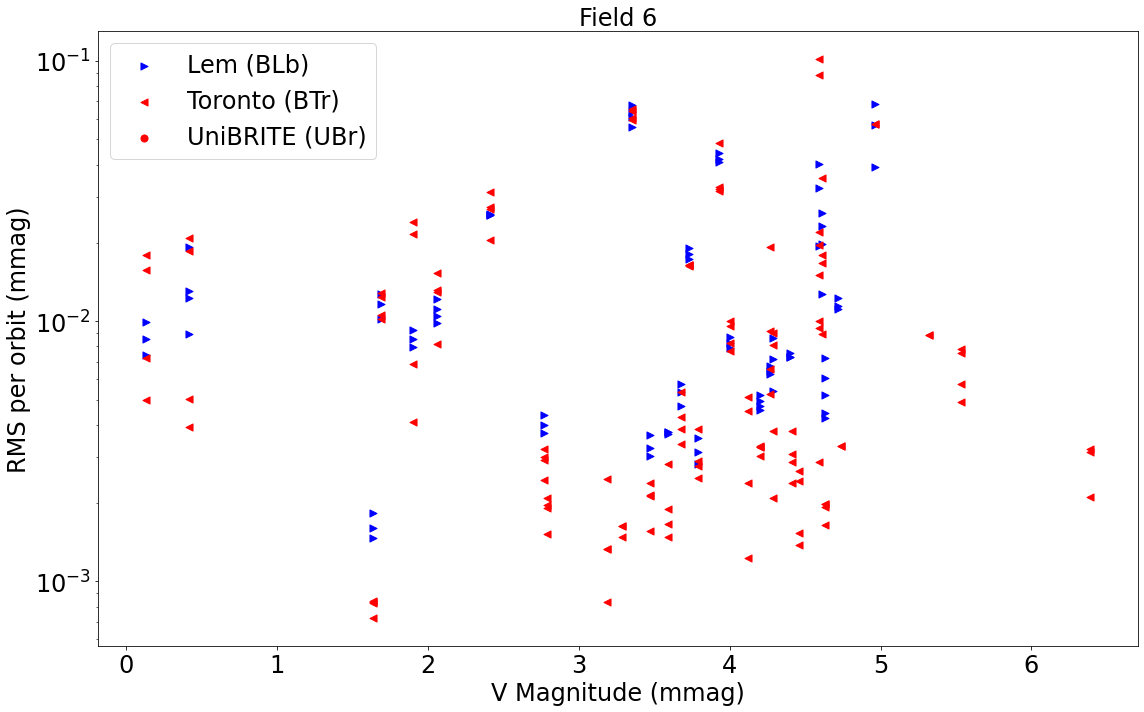

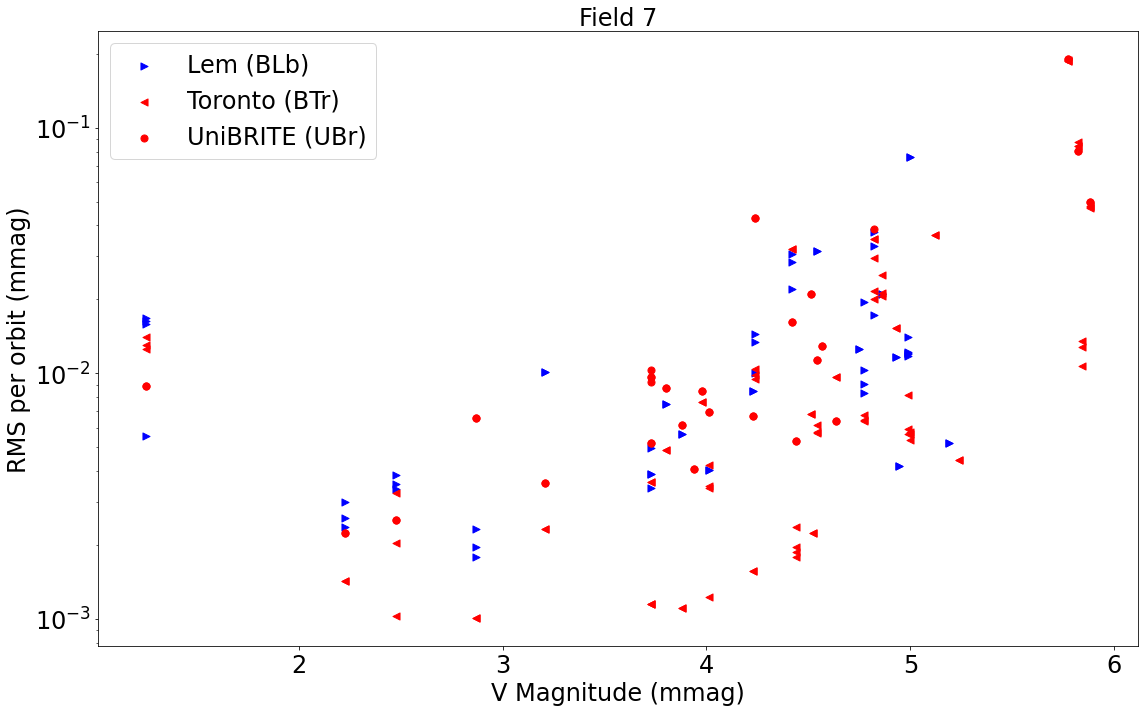

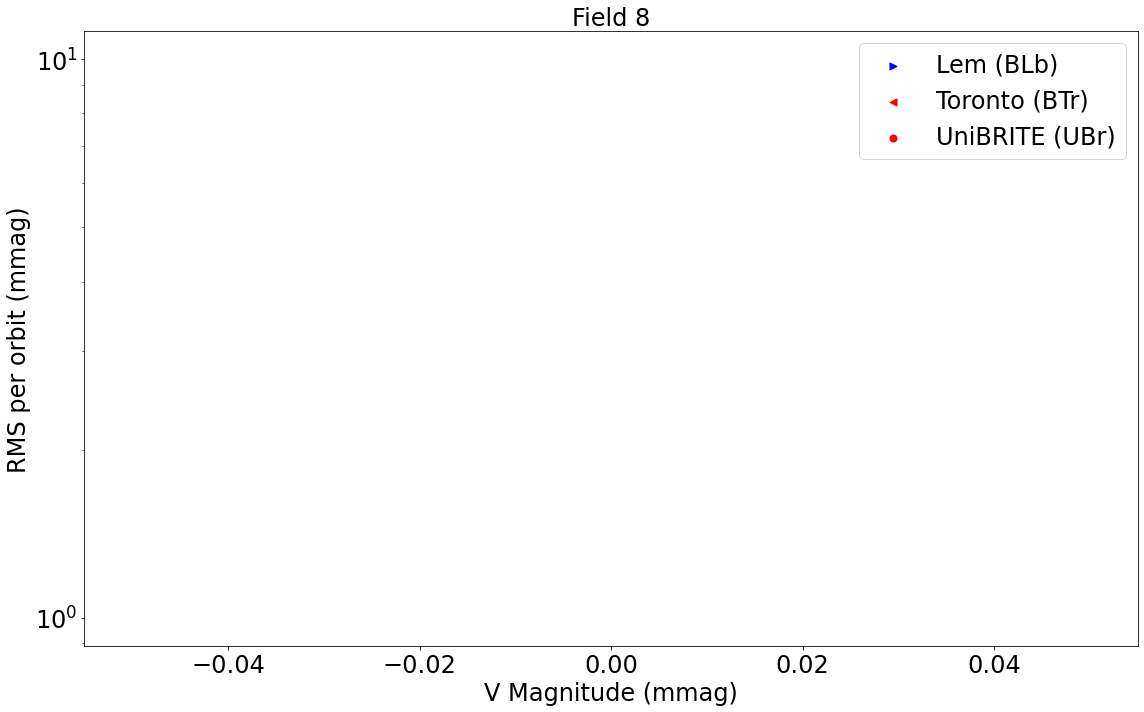

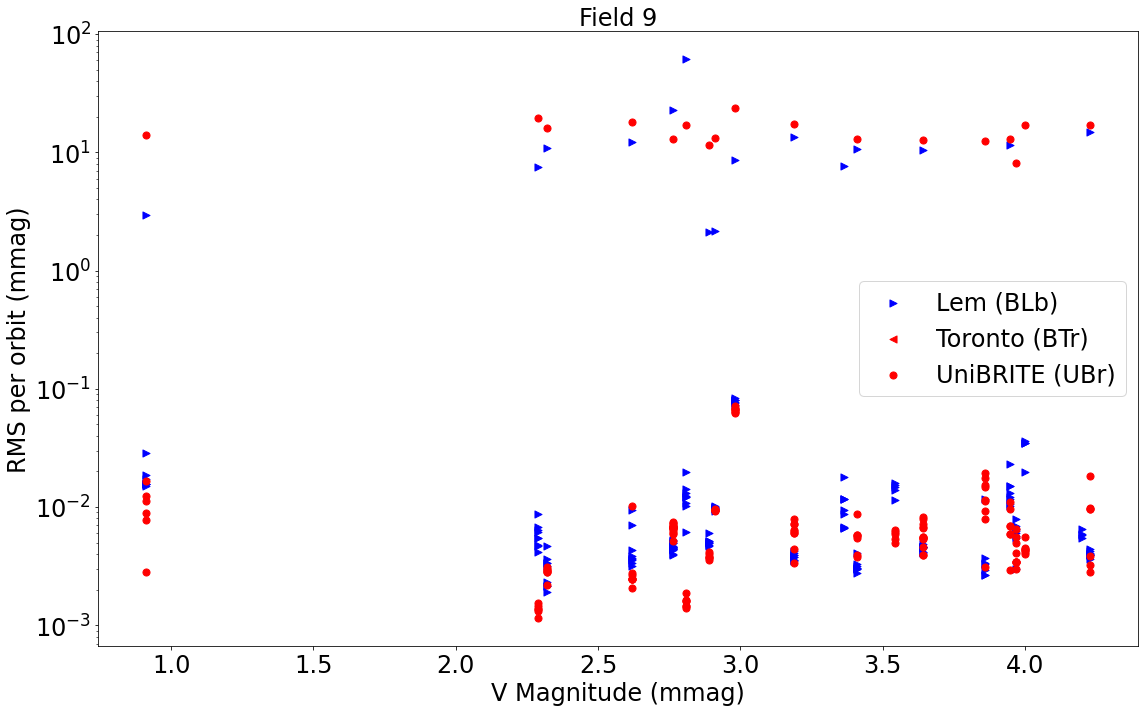

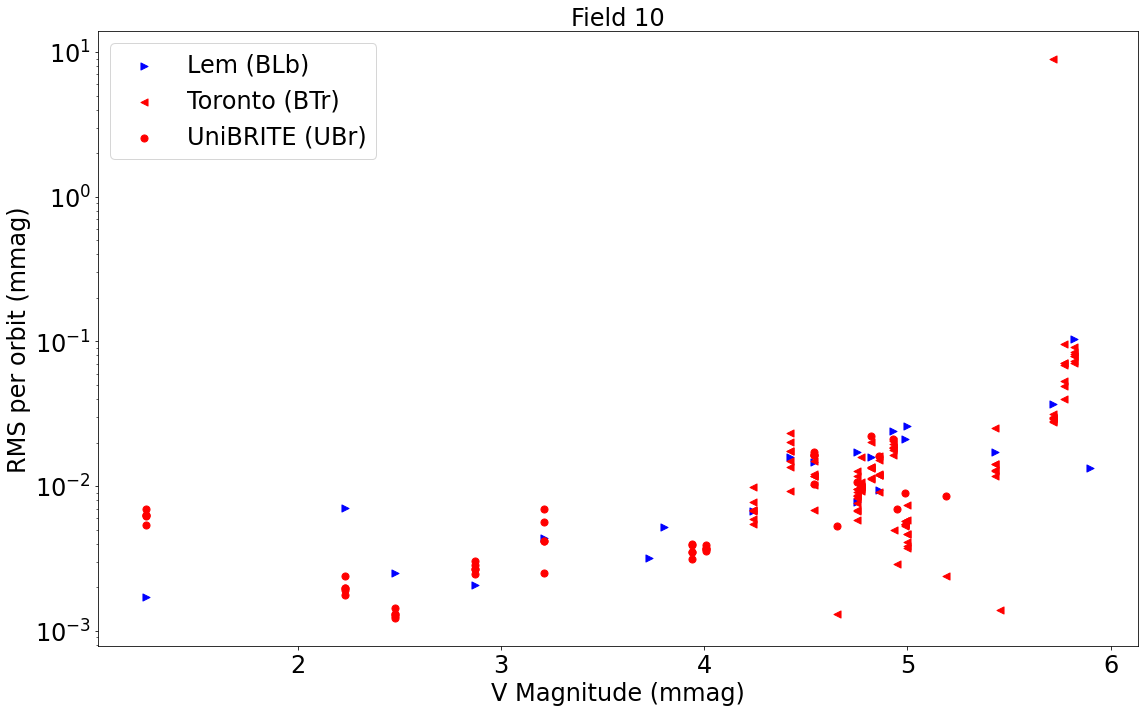

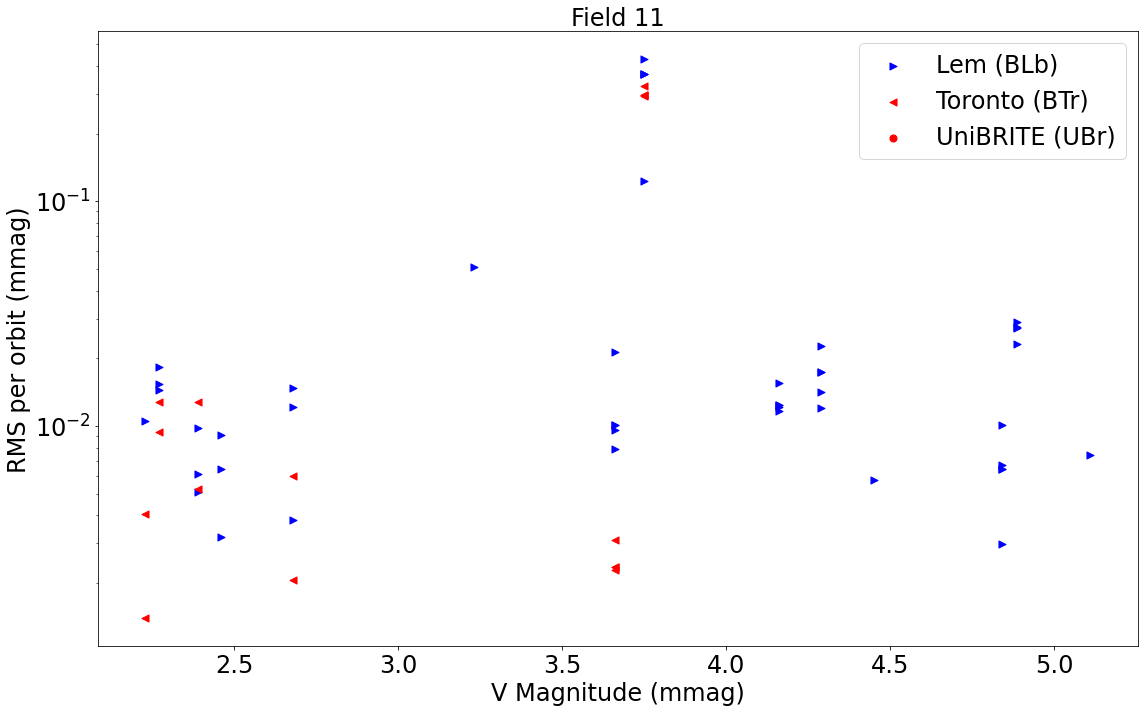

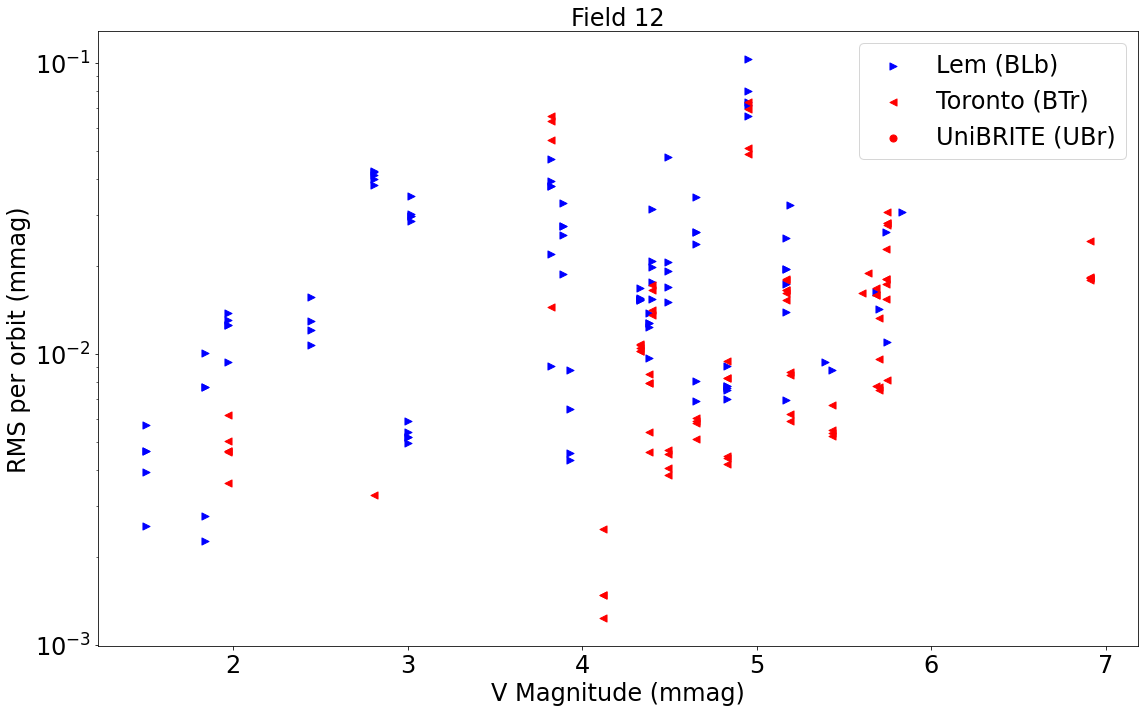

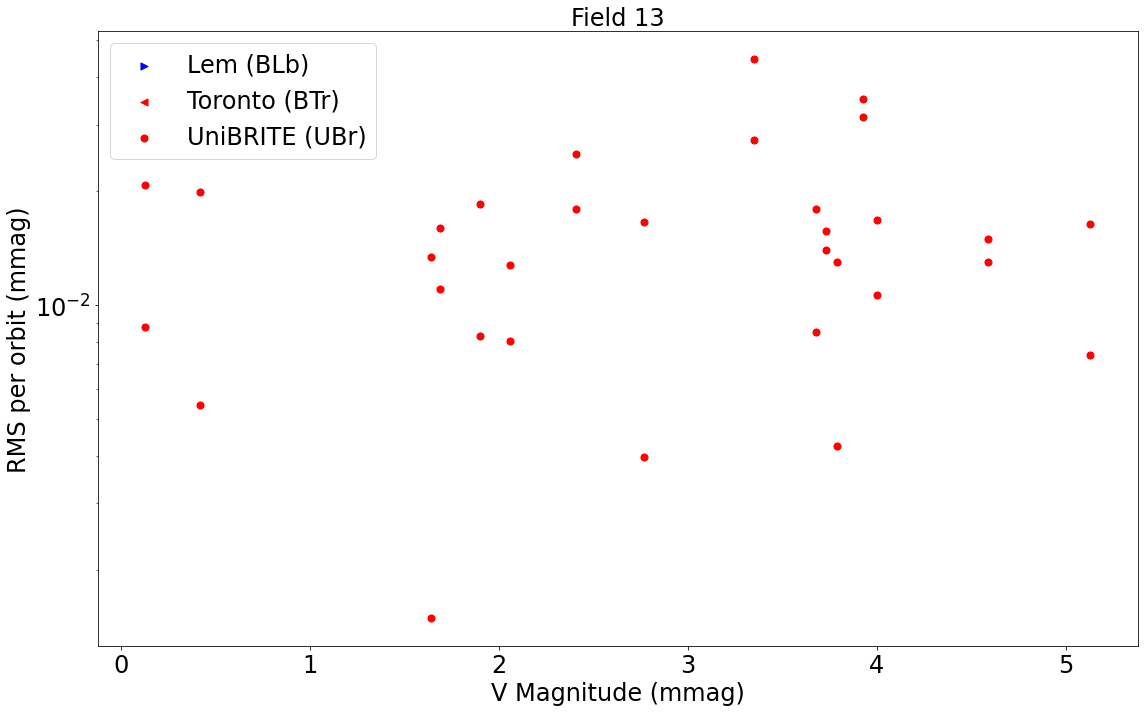

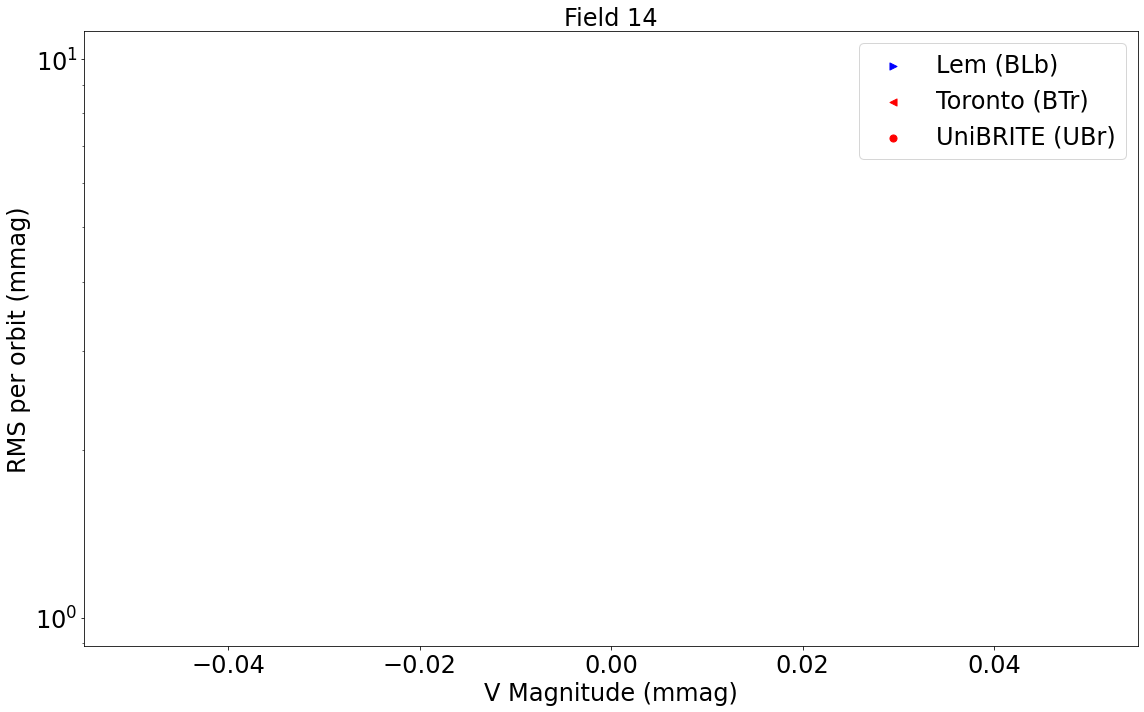

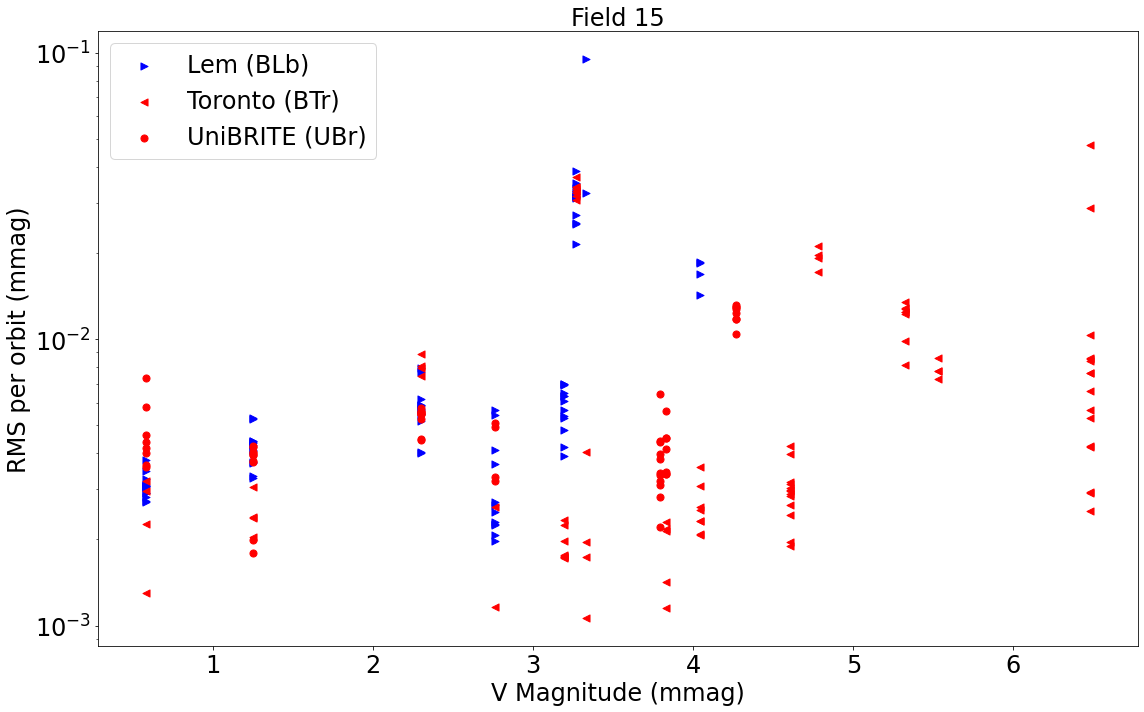

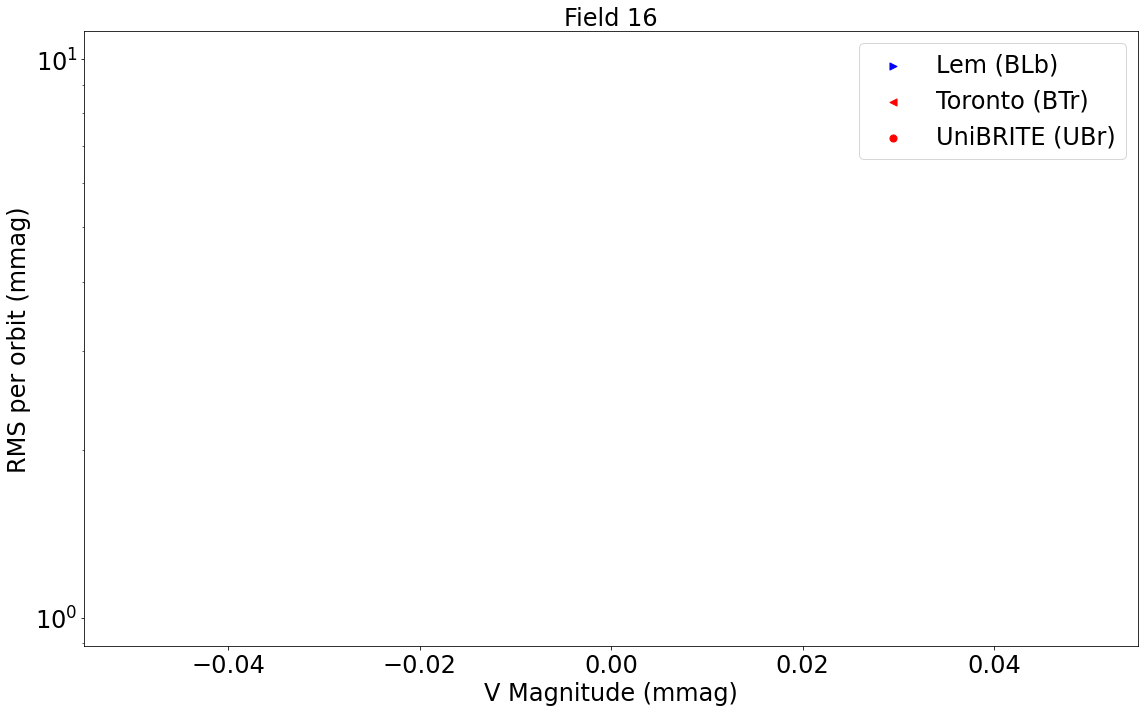

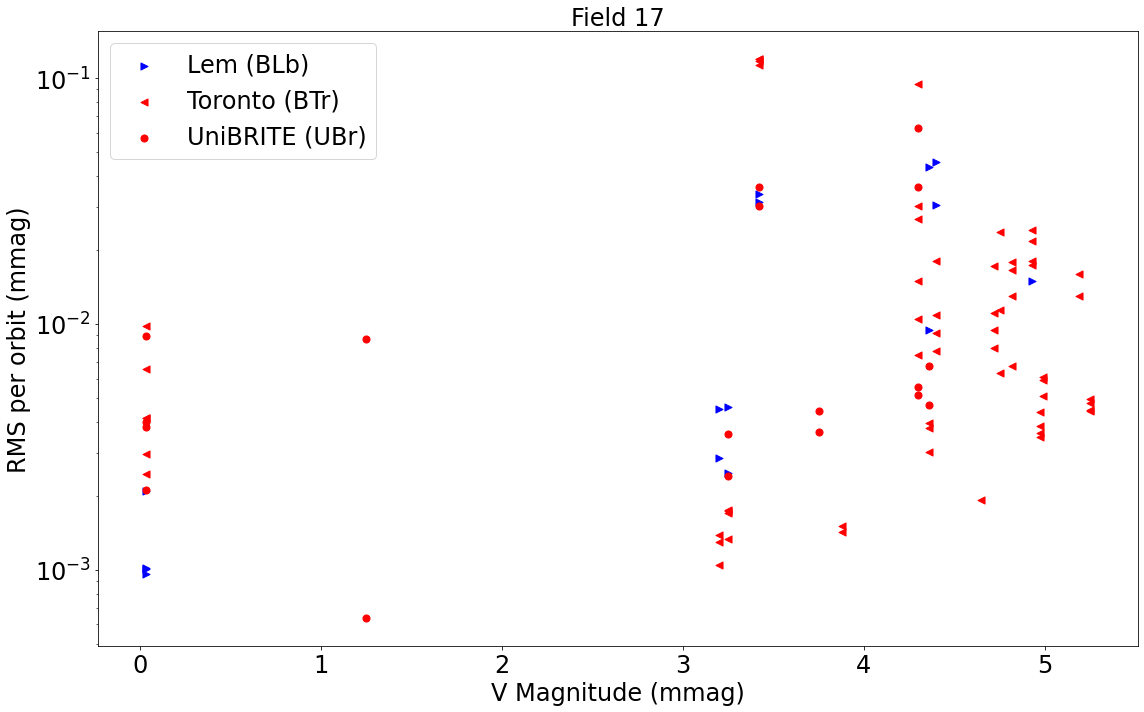

In [13]:
for i in range(1,18):
    internal_data_file = f"stats_data_field_{i}.csv"
    data = pd.read_csv(internal_data_file)
    fig : Figure = plt.figure(figsize=(16,10))
    ax : Axes = fig.add_subplot(111)

    for satellite in satellites:
        data_satellite = data[data["Satellite"] == satellite]
        ax.scatter(data_satellite["V Magnitude"], data_satellite["RMS per orbit"], s=50, marker=marker_dict[satellite], color=marker_colors[satellite], label=marker_names[satellite])

    ax.set_xlabel("V Magnitude (mmag)")
    ax.set_ylabel("RMS per orbit (mmag)")
    ax.set_yscale('log')
    pl.title(f"Field {i}")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"field_{i}_rms_vs_vmag_{'merged_files' if use_only_merged_files else 'setups'}.png")

In [1]:
#filter data by unique stars
for i in range(1,18):
    internal_data_file = f"stats_data_field_{i}.csv"
    data = pd.read_csv(internal_data_file)
    filtered_data = data.sort_index().groupby("Starname").first()
    hist_data = filtered_data["V Magnitude"]
    hist,bins = np.histogram(hist_data, bins=np.linspace(2,6,5))
    fig : Figure = plt.figure(figsize=(16,10))
    ax : Axes = fig.add_subplot(111)
    ax.bar(bins[:-1],hist,color="red",edgecolor="black",width=bins[1]-bins[0] - 0.1)
    ax.set_xlabel("V Magnitude (mmag)")
    ax.set_ylabel("Number of stars")
    pl.title(f"Field {i}")
    plt.tight_layout()
    plt.savefig(f"field_{i}_vmag_hist.png")

NameError: name 'pd' is not defined

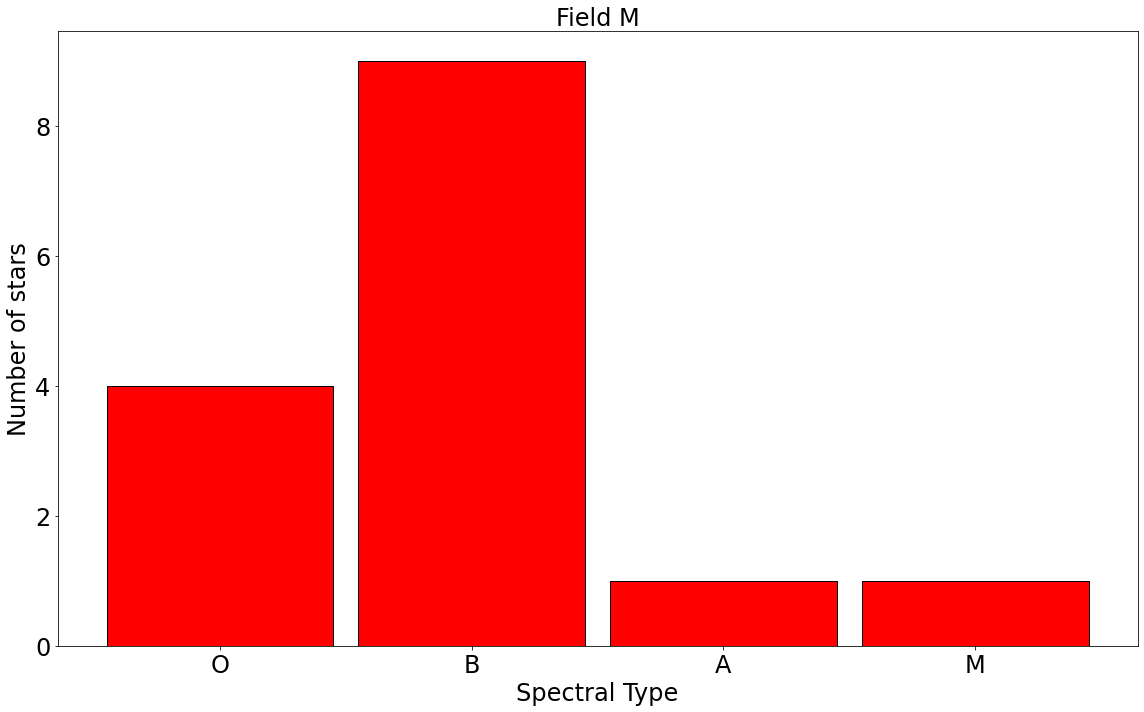

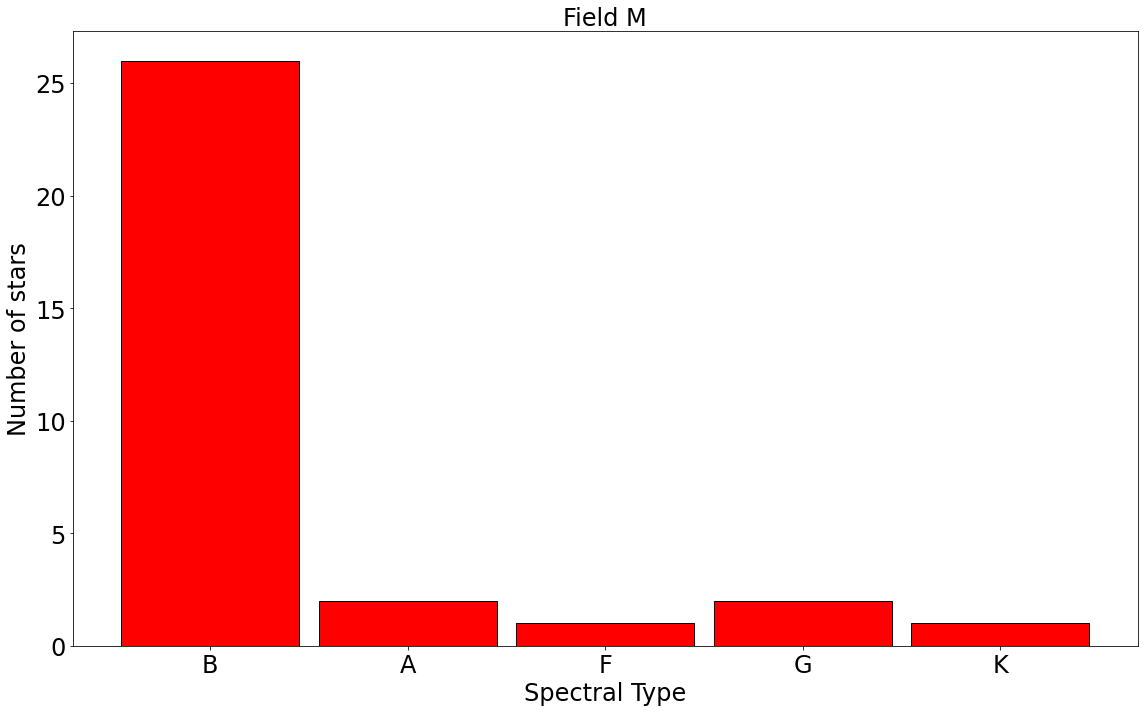

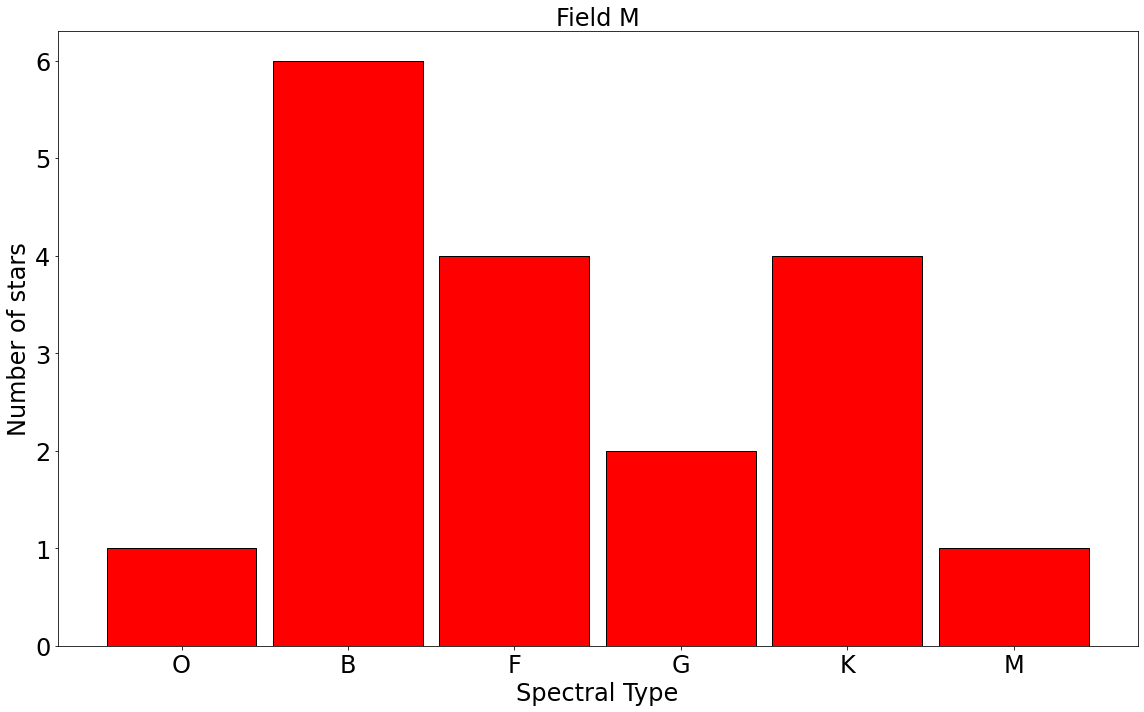

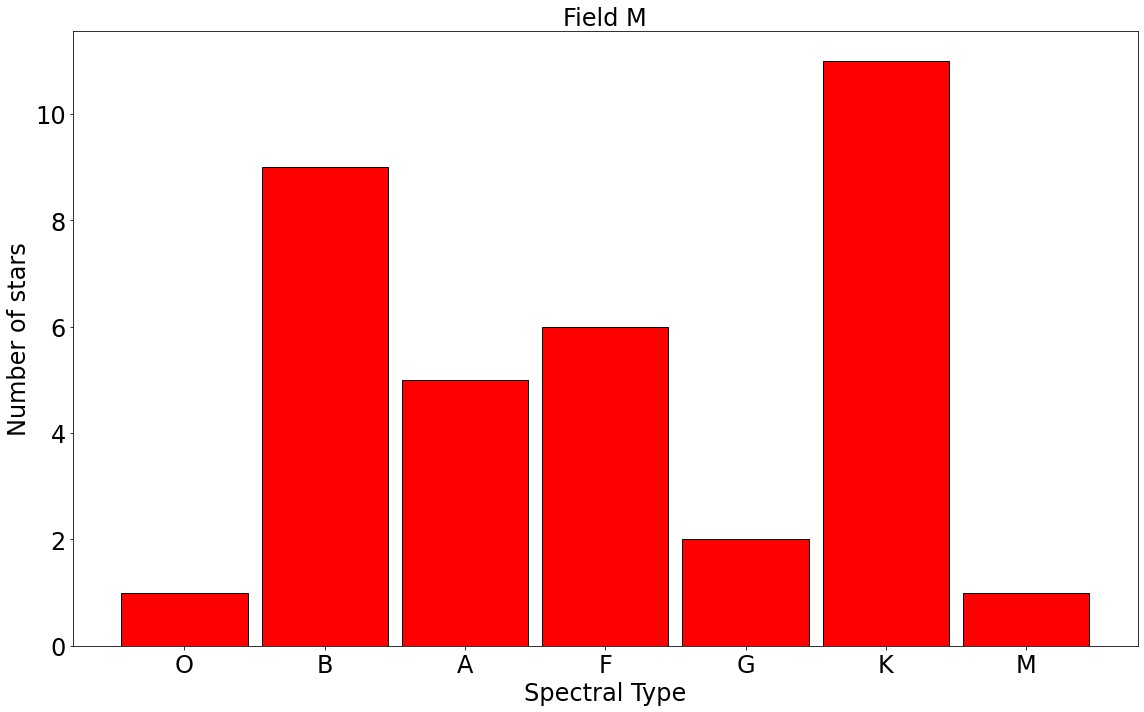

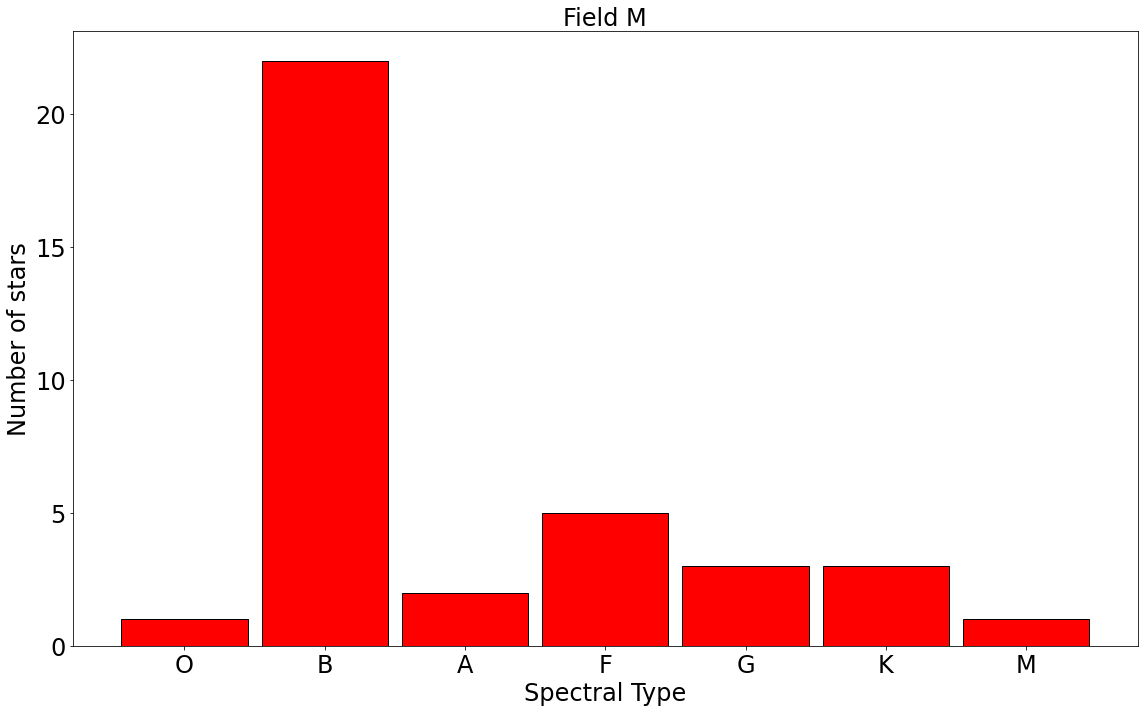

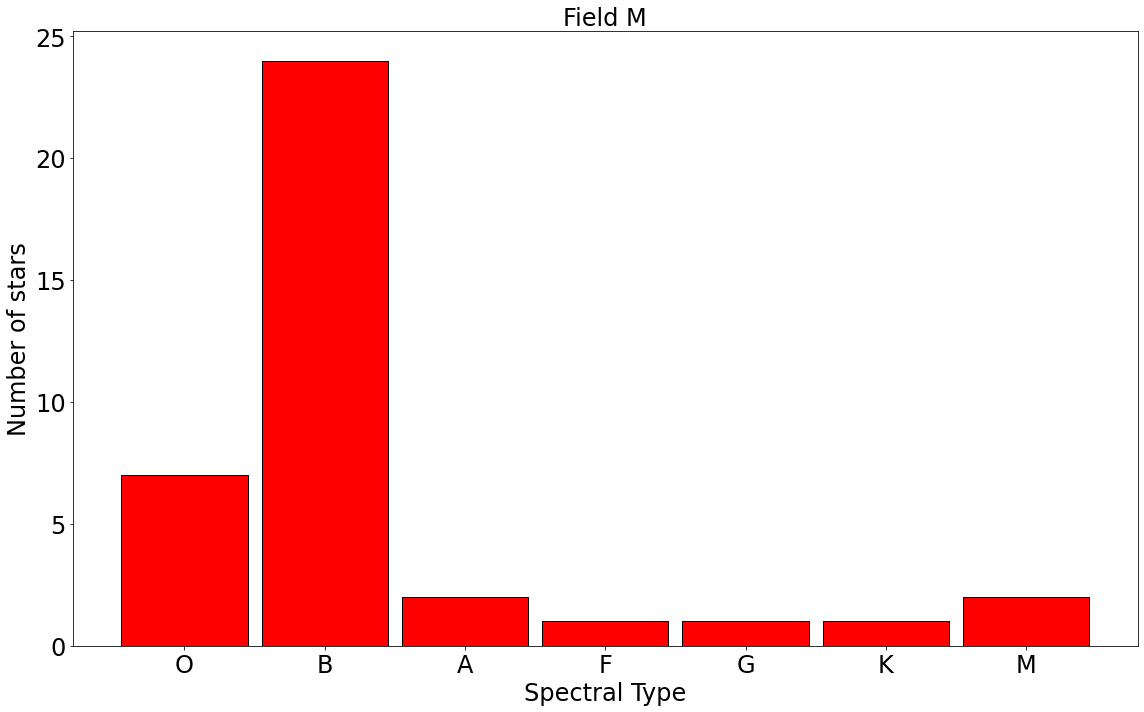

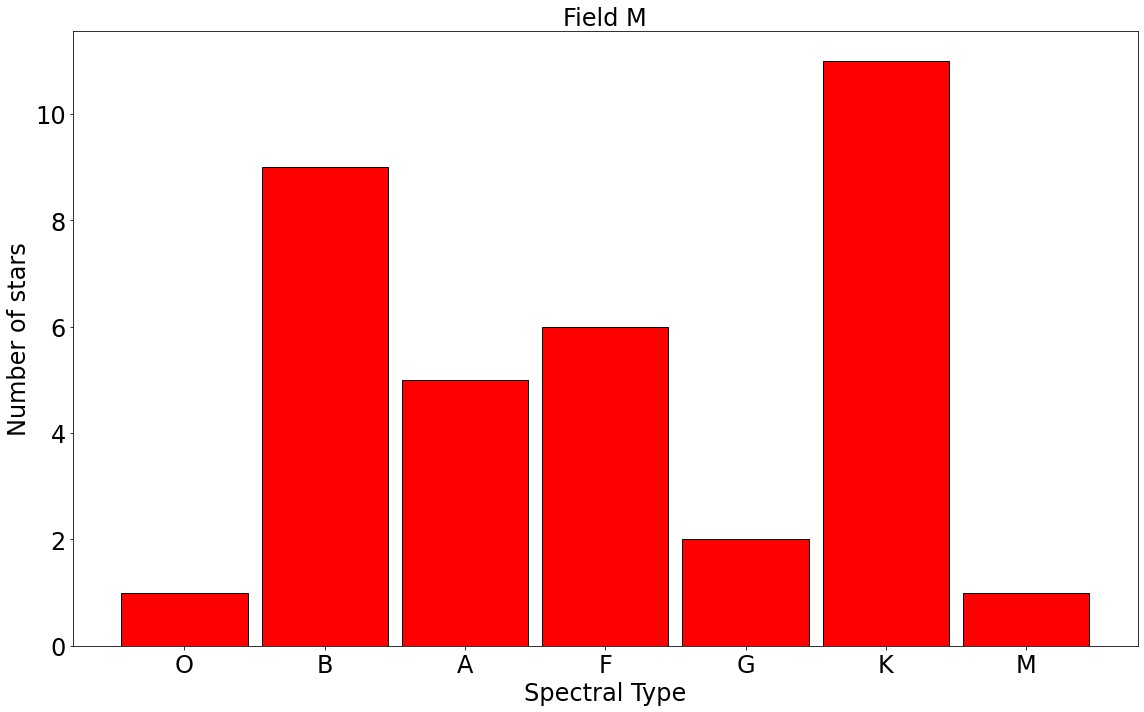

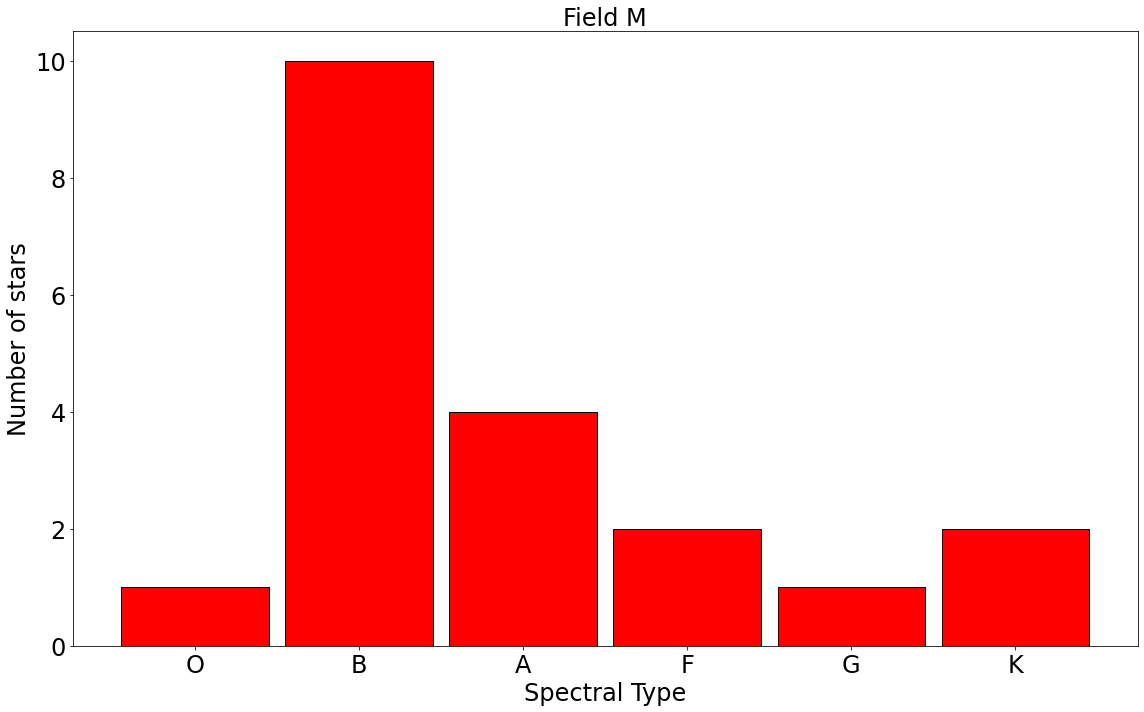

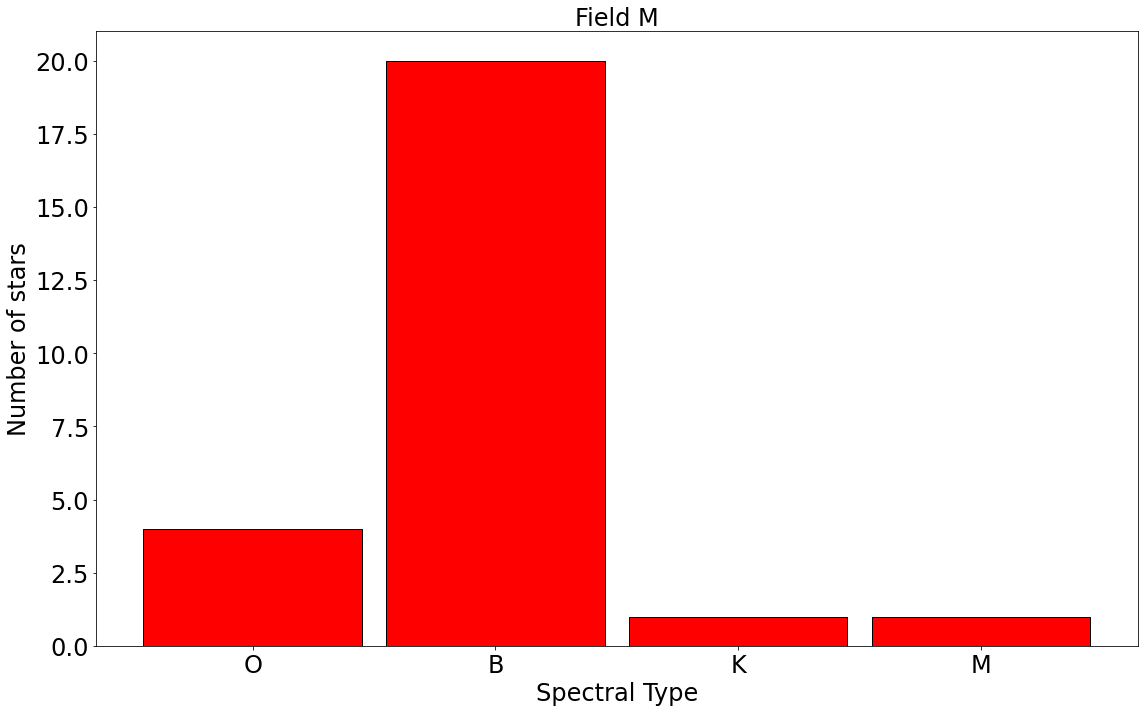

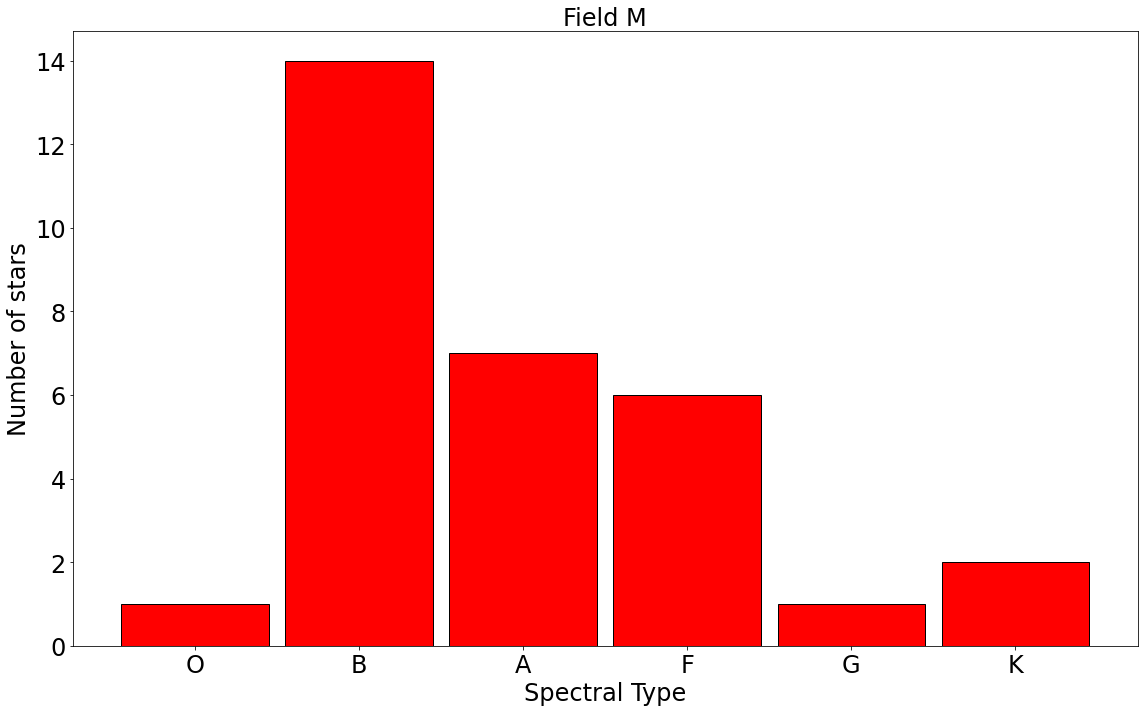

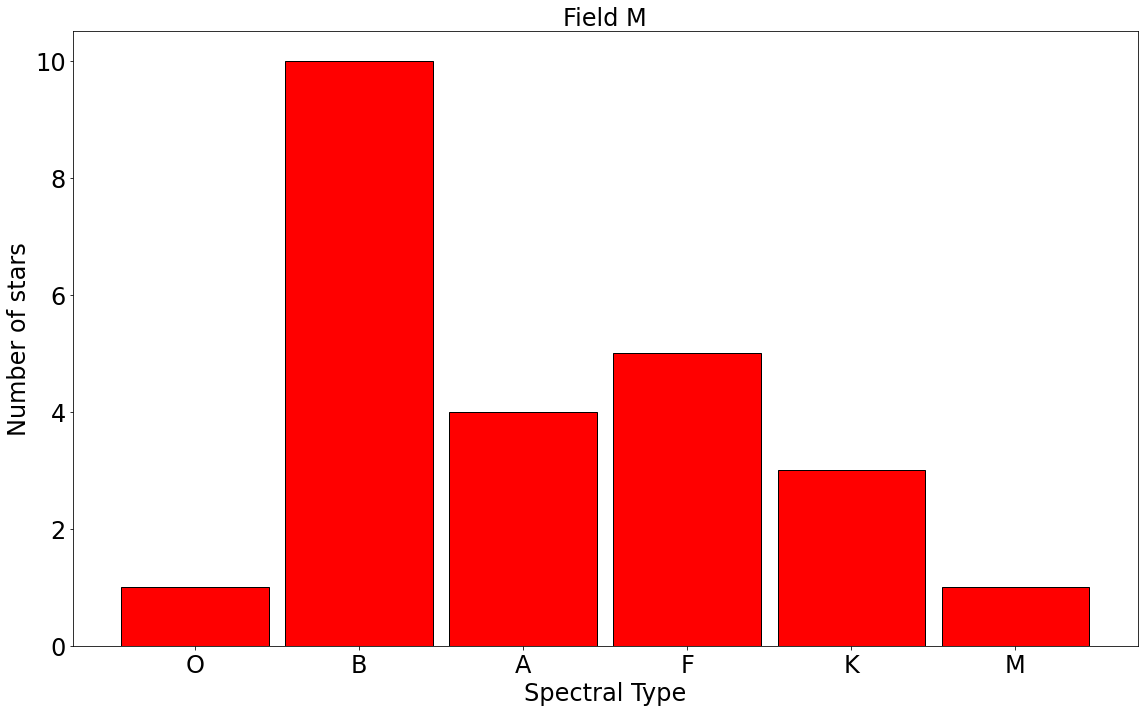

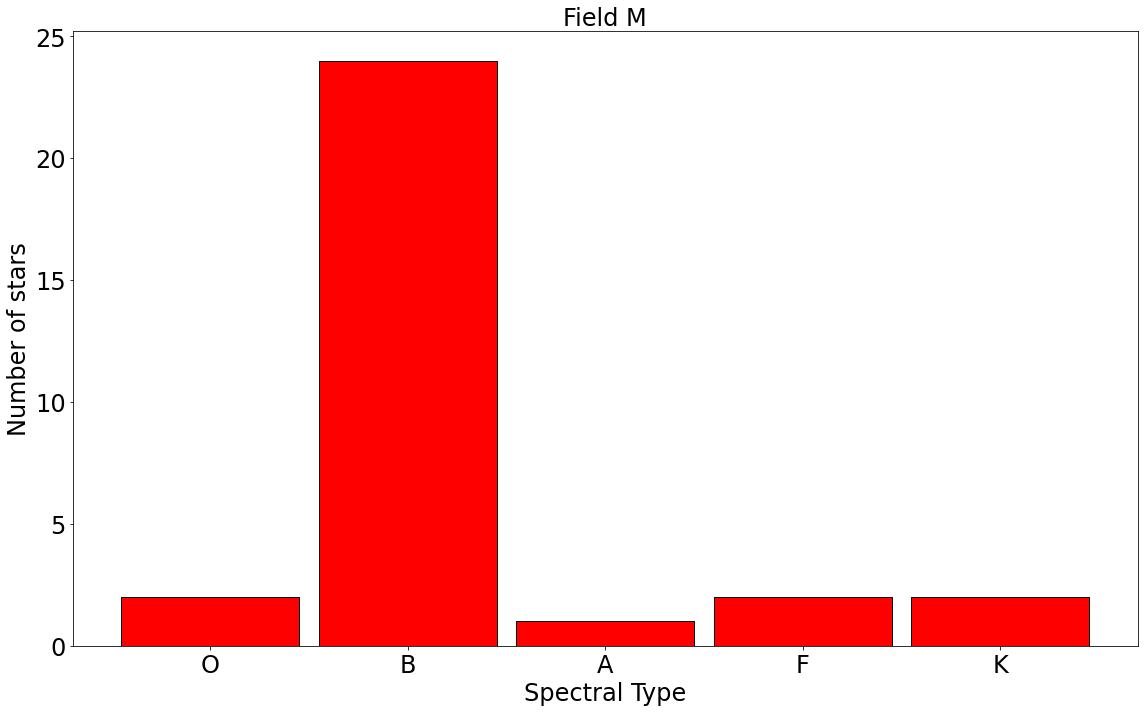

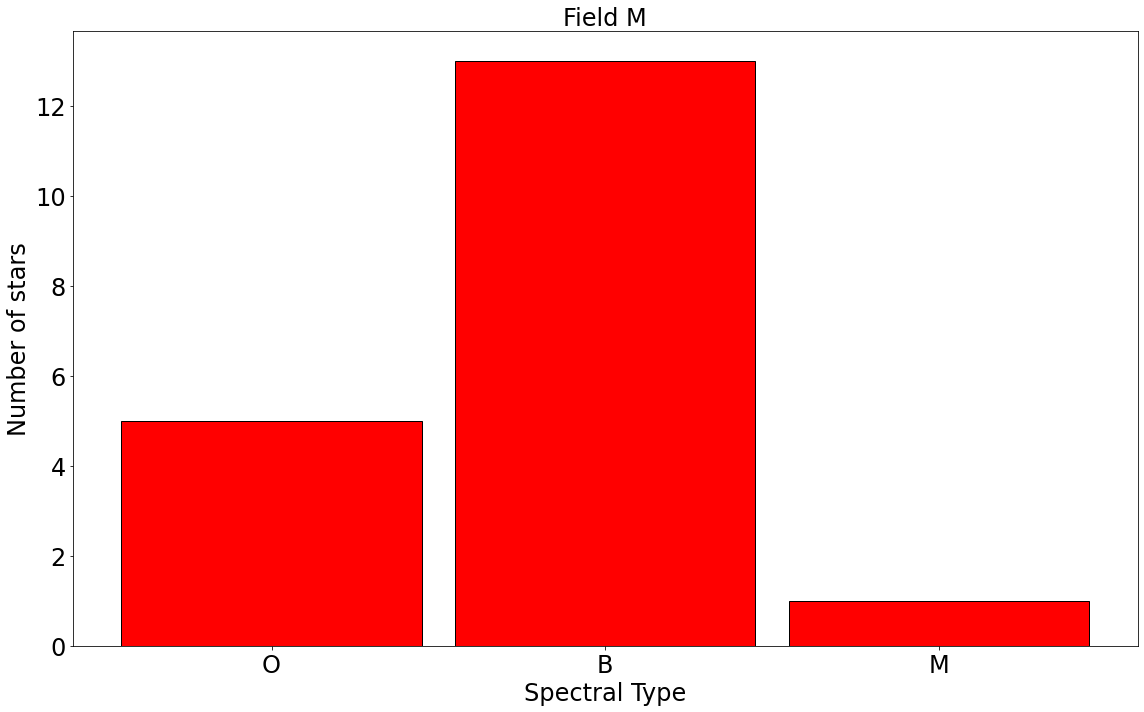

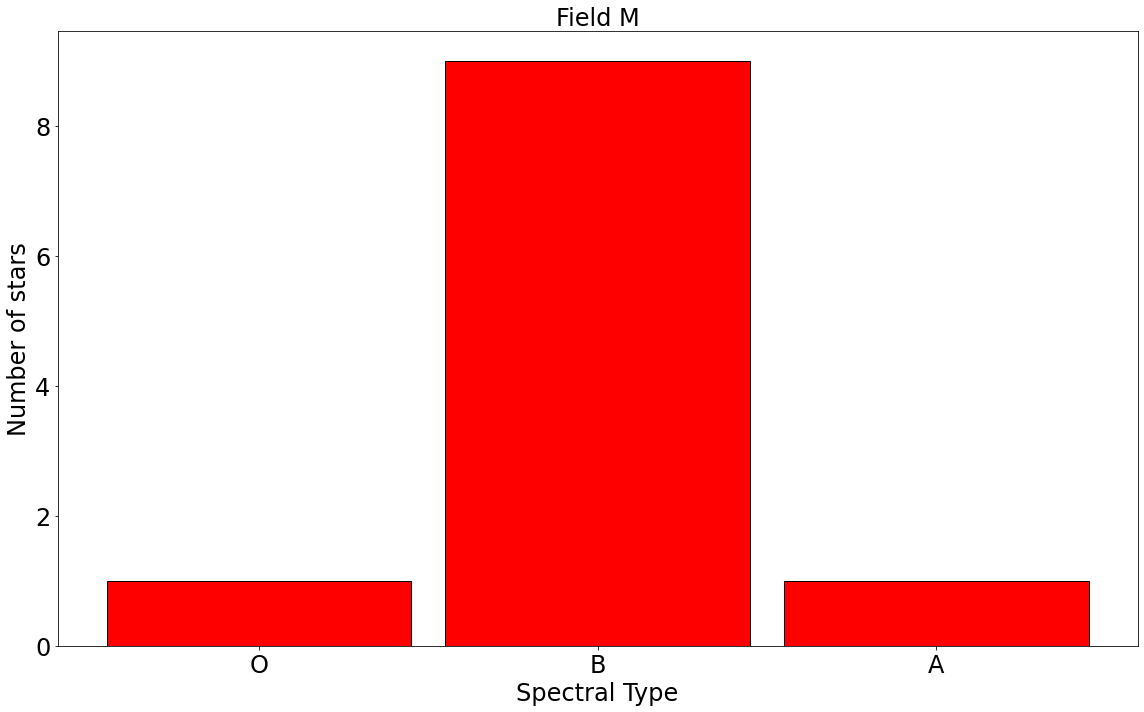

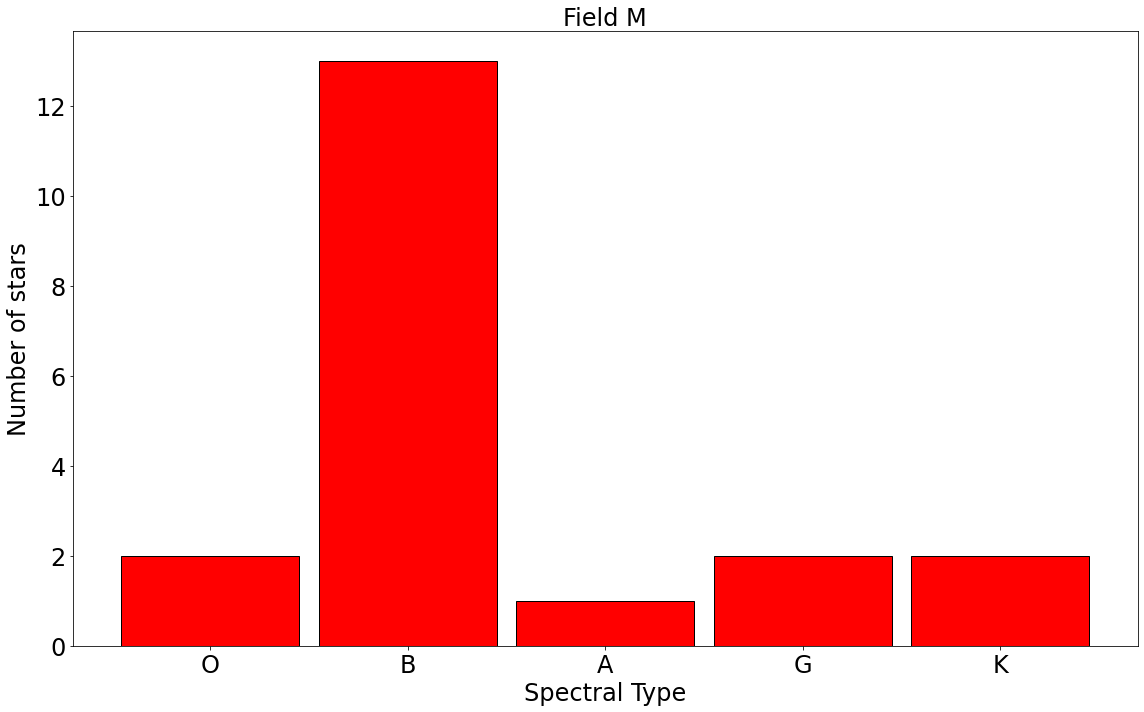

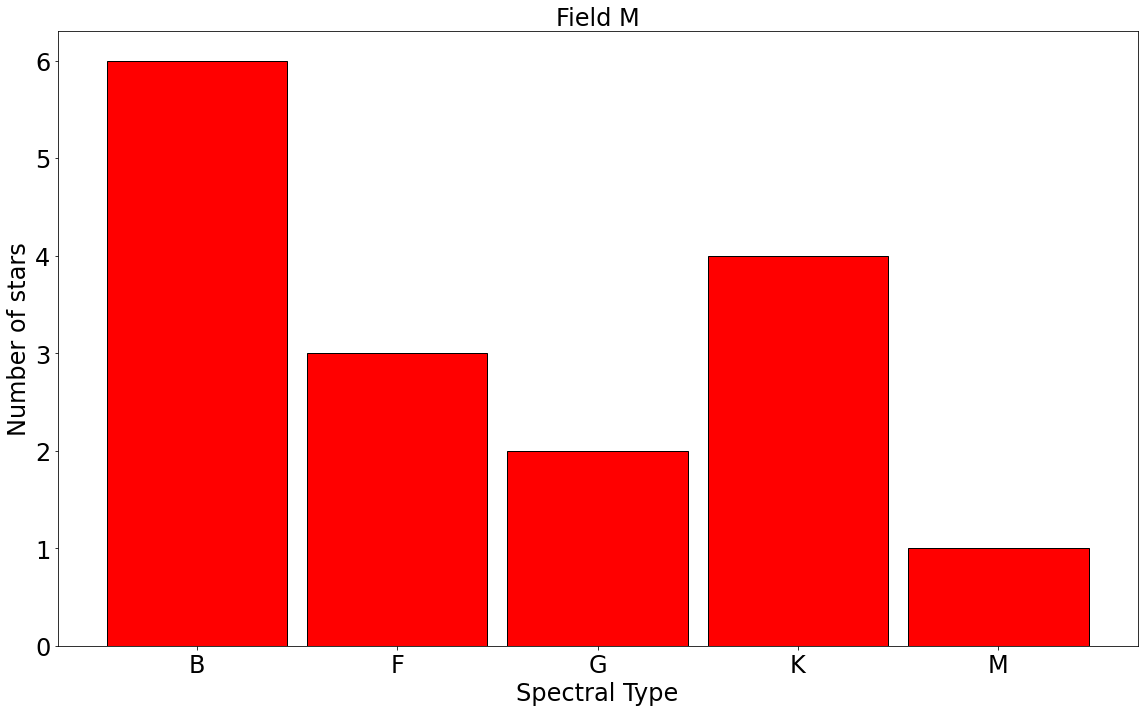

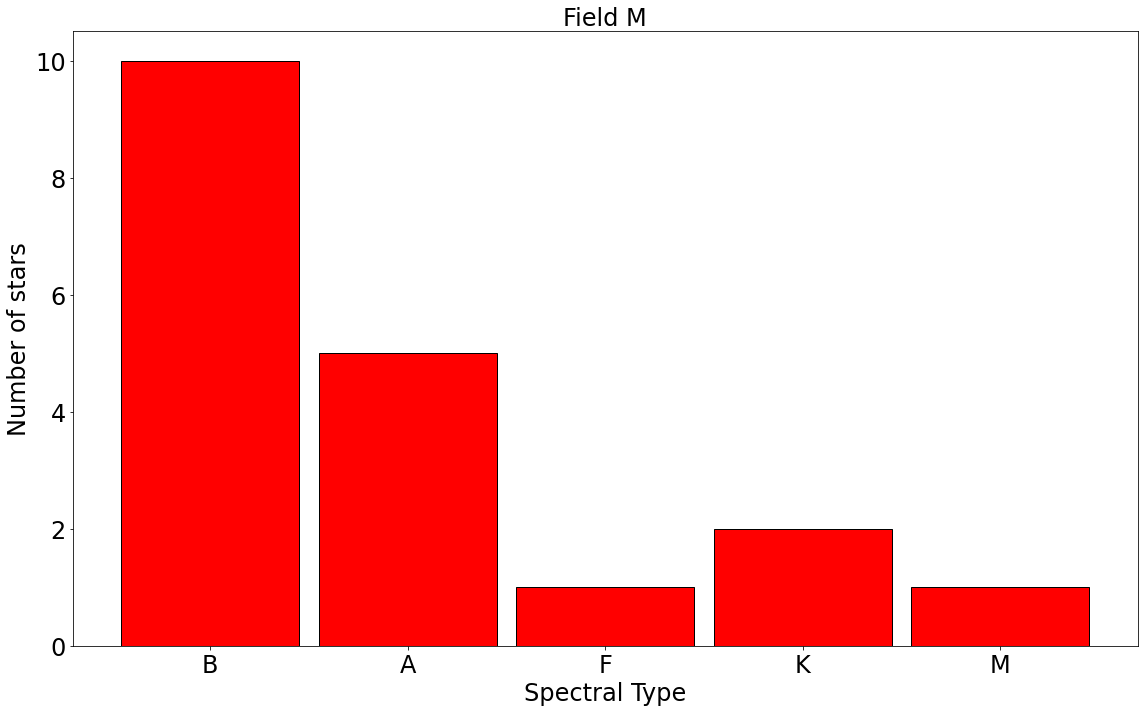

In [17]:
for i in range(1,18):
    internal_data_file = f"stats_data_field_{i}.csv"
    data = pd.read_csv(internal_data_file)
    filtered_data = data.sort_index().groupby("Starname").first()
    hist_data = filtered_data["Spectral Type"]
    data_dict = {}
    for i in hist_data:
        if i in data_dict:
            data_dict[i] += 1
        else:
            data_dict[i] = 1

    spectral_order = ["O","B","A","F","G","K","M"]

    x_values = []
    y_values = []
    for i in spectral_order:
        if i in data_dict:
            x_values.append(i)
            y_values.append(data_dict[i])

    fig : Figure = plt.figure(figsize=(16,10))
    ax : Axes = fig.add_subplot(111)
    ax.bar(x_values,y_values,color="red",edgecolor="black",width=bins[1]-bins[0] - 0.1)
    ax.set_xlabel("Spectral Type")
    ax.set_ylabel("Number of stars")
    pl.title(f"Field {i}")
    plt.tight_layout()
    plt.savefig(f"field_{i}_spectral_type_hist.png")